In [66]:
import xgboost as xgb
import pandas as pd
import itertools
import numpy as np
import seaborn as sns
from lazypredict.Supervised import LazyRegressor
import matplotlib.pyplot as plt
import sklearn.preprocessing as skp
import sklearn.metrics as skm
import sklearn.ensemble as ske
import sklearn.model_selection as sms
import sklearn.linear_model as skl

%matplotlib inline

In [3]:
data_test = pd.read_csv("../data/prepared_test.csv", sep=";", index_col=0).sort_index()
data_test.head()

,dteday,season,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
7,07.01.2011,1,0,1,0,1,7.86,0.21,74.80,0.17,...,0,0,0,0,0,1,0,0,1,0
11,11.01.2011,1,0,1,0,1,6.76,0.19,102.95,0.12,...,0,0,1,0,0,0,0,0,1,0
14,14.01.2011,1,0,1,0,1,6.43,0.19,80.67,0.13,...,0,0,0,0,0,1,0,1,0,0
16,16.01.2011,1,0,1,0,0,9.27,0.23,72.56,0.19,...,1,0,0,0,0,0,0,1,0,0
18,18.01.2011,1,0,1,0,1,8.67,0.23,129.25,0.15,...,0,0,1,0,0,0,0,0,1,0


In [4]:
data_train = pd.read_csv("../data/prepared_train.csv", sep=";", index_col=0
                         ).sort_index()
data_train.head()

,dteday,season,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
1,01.01.2011,1,0,1,0,0,13.77,0.36,120.87,0.16,...,0,0,0,0,0,0,1,0,1,0
2,02.01.2011,1,0,1,0,0,14.54,0.35,104.41,0.25,...,1,0,0,0,0,0,0,0,1,0
3,03.01.2011,1,0,1,0,1,7.85,0.19,65.59,0.25,...,0,1,0,0,0,0,0,1,0,0
4,04.01.2011,1,0,1,0,1,8.00,0.21,88.57,0.16,...,0,0,1,0,0,0,0,1,0,0
5,05.01.2011,1,0,1,0,1,9.08,0.23,65.54,0.19,...,0,0,0,1,0,0,0,1,0,0


## Initial Model Selection ##

In [5]:
#multicolinear = ["mnth", "temp", "hum", "leaflets"]
multicolinear = ["hum", "temp"]
# features = ('season',
#  'yr',
#  'atemp',
#  'weekday_0',
#  'weekday_1',
#  'weekday_2',
#  'weathersit_1',
#  'weathersit_3')

In [6]:
scaler = skp.StandardScaler()
data_features = data_train.drop(
    columns=["dteday", "casual", "registered", "cnt", *multicolinear]).columns.to_list()

X_train = scaler.fit_transform(X=data_train[data_features], y=data_train["cnt"])

Y_train = data_train["cnt"].copy()

X_test = scaler.transform(data_test[data_features])

Y_test = data_test["cnt"].copy()

In [7]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, predictions=True)
models, pred = reg.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████▊| 41/42 [00:04<00:00, 11.71it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 592, number of used features: 17
[LightGBM] [Info] Start training from score 4455.685811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████| 42/42 [00:04<00:00,  9.35it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [8]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.85,0.87,693.50,0.21
XGBRegressor,0.83,0.85,745.62,0.13
ExtraTreesRegressor,0.83,0.85,753.89,0.43
HistGradientBoostingRegressor,0.82,0.85,756.70,0.94
LGBMRegressor,0.81,0.84,782.32,0.23
RandomForestRegressor,0.81,0.83,797.18,0.74
BaggingRegressor,0.80,0.83,812.77,0.10
AdaBoostRegressor,0.75,0.79,903.69,0.14
LassoCV,0.74,0.78,924.94,0.06


Top drei Algorithmen:
- GradientBoostingRegressor
- XGBRegressor
- ExtraTressRegressor

In [9]:
def actualVsPredictChart(true_v, pred_v):
    data = {"Actual": true_v, "Predicted": pred_v}
    df = pd.DataFrame(data)

    # Create a lineplot with Seaborn
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    sns.lineplot(data=df, markers=False)

    plt.title("Actual vs. Predicted Values")
    plt.xlabel("Data Points")
    plt.ylabel("Values")

    plt.show()

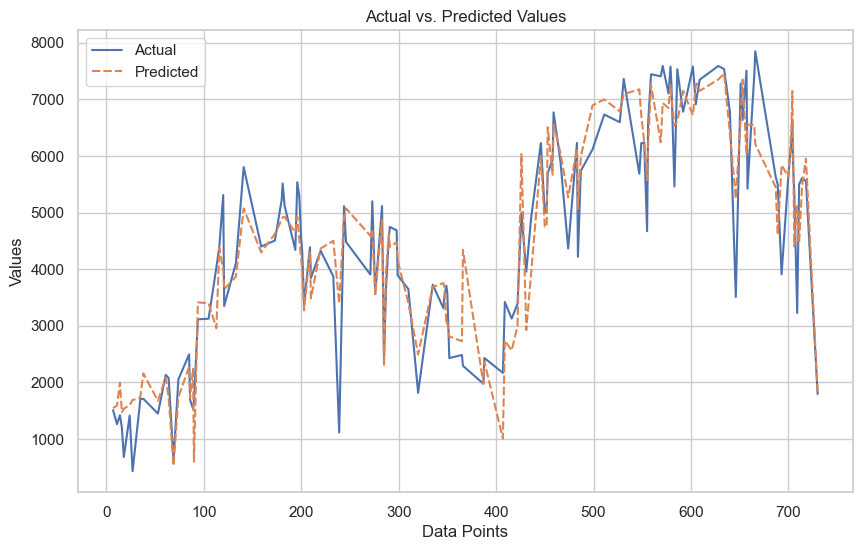

In [10]:
actualVsPredictChart(Y_test, pred["GradientBoostingRegressor"].to_numpy())

#### Hyperparameter ####
- GradientBoostingRegressor
- XGBRegressor
- ExtraTressRegressor

Hier werden alle Hyperparameter definiert. Die Listen enthalten die möglichen Werte eines jeden Parameters. Jedes Modell hat verschiedene Hyperarameter.

In [21]:
gbRegressor = {
    "loss": ['quantile'],#'squared_error', 'absolute_error', 'huber', 
    "alpha":[0.2*x for x in range(1, 5)],
    "criterion": ['friedman_mse', 'squared_error'],
    "learning_rate": [0.1*x for x in range(-2, 3)],
    "max_depth": [None, 5, 10],
    "n_estimators": [50, 100, 200]
    }
xgbRegressor = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "max_leaves": [0, 5, 10, 20],
    "learning_rate": [0.2*x for x in range(1, 5)],
    "booster": ["gbtree", "gblinear", "dart"],
    "grow_policy": [0, 1],
    "gamma": [1e-3, 1e-1, 1],
    "reg_alpha": [1e-3, 1e-1, 1],
    "reg_lambda": [1e-3, 1e-1, 1],
    "metric": [skm.mean_absolute_error]
}

etRegressor = {
    "n_estimators": [50, 100, 200],
    "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],
    "max_features": ["sqrt", "log2"],
    "max_depth": [None, 3, 5, 10]
}

features = {
    ske.GradientBoostingRegressor: gbRegressor,
    xgb.XGBRegressor: xgbRegressor,
    ske.ExtraTreesRegressor: etRegressor
}

In [22]:
model_select_results = pd.DataFrame(columns=["model", "params", "mae"])
for model_type in features:
    gs_model = sms.GridSearchCV(estimator=model_type(),
                                param_grid=features[model_type],
                                n_jobs=-1,
                                scoring='neg_mean_absolute_error')
    
    gs_model.fit(X_train, Y_train)
    print(f"Model type {str(model_type)}\nreached MAE of {gs_model.best_score_*-1}\n Params: {gs_model.best_params_}")
    model_select_results.loc[len(model_select_results)] = [gs_model.best_estimator_, gs_model.best_params_, gs_model.best_score_*-1]

model_select_results.sort_values("mae", inplace=True)

Model type <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
reached MAE of 713.7971896514825
 Params: {'alpha': 0.6000000000000001, 'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'quantile', 'max_depth': 5, 'n_estimators': 200}
Model type <class 'xgboost.sklearn.XGBRegressor'>
reached MAE of 743.1116456025686
 Params: {'booster': 'gblinear', 'gamma': 0.001, 'grow_policy': 0, 'learning_rate': 0.2, 'max_depth': None, 'max_leaves': 0, 'metric': <function mean_absolute_error at 0x000001D11FB4E480>, 'n_estimators': 100, 'reg_alpha': 0.001, 'reg_lambda': 0.1}
Model type <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>
reached MAE of 912.511353226036
 Params: {'criterion': 'absolute_error', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}


In [51]:
model_select_results

,model,params,mae
0,([DecisionTreeRegressor(criterion='friedman_ms...,"{'alpha': 0.6000000000000001, 'criterion': 'fr...",713.80
1,"XGBRegressor(base_score=None, booster='gblinea...","{'booster': 'gblinear', 'gamma': 0.001, 'grow_...",743.11
2,(ExtraTreeRegressor(criterion='absolute_error'...,"{'criterion': 'absolute_error', 'max_depth': N...",912.51


In [52]:
model_select_results.loc[0, "params"]

{'alpha': 0.6000000000000001,
 'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'quantile',
 'max_depth': 5,
 'n_estimators': 200,
 'n_jobs': -1}

In [53]:
type(model_select_results.loc[0, "model"])()

GradientBoostingRegressor()

## Feature Selection ##

* !!! noch nicht fertig, wird noch geändert


Diese Funktion gibt alle möglichen, nicht-wiederholenden Kombinationen der unabhängigen Variablen aus. Die Liste enthält die höchste Anzhalt zu Beginn und wird danach immer kürzer (Backward Eliminiation).

In [112]:
def get_feature_combinations(features):
    all_combinations = []
    for r in range(1, len(features) + 1):
        combinations = itertools.combinations(features, r)
        all_combinations.extend(combinations)

    # Backwards Elimination
    return all_combinations[::-1]

Das die Hyperparameter des besten Modells werden verwendet, um die beste Kombination an Features zu erhalten. Um die Ausführungszeit zu verkürzen, wird geprüft, ob der MAE fünf Mal hintereinander schlechter wird. Ist das der Fall, wird die Schleife beendet. Die Ergebnisse werden in einem DataFrame gespeichert.

In [113]:
X_train = data_train[data_features]
X_test = data_test[data_features]
Y_train = data_train["cnt"]
Y_test = data_test["cnt"]

In [114]:
def eval_model_params(features, params=None):

    # Refit scaler
    scaler.fit(X_train.loc[:, features])

    reg = skl.Ridge(random_state=1)
    reg.fit(scaler.transform(X_train.loc[:, features]), Y_train)

    # Model scores
    sc = sc = reg.score(scaler.transform(X_train.loc[:, features]), Y_train)
    y_pred = reg.predict(scaler.transform(X_test.loc[:, features]))
    r2 = skm.r2_score(Y_test, y_pred)
    rmse = np.sqrt(skm.mean_squared_error(Y_test, y_pred))
    mae = skm.mean_absolute_error(Y_test, y_pred)
    coefs = reg.coef_

    #print("Eval done")
    return dict(#model=type(reg),
                features=features,
                coefs=coefs,
                score=sc,
                #y_pred=y_pred,
                r2=r2,
                rmse=rmse,
                mae=mae)
                #**params)

Der Modelltyp, der zuvor bei der Modellselektion als genauestes Modell ermittelt wurde, wird in der Variable `model_type` gespeichert. Mit diesem Modell wird die Feature Selection durchgeführt.

Vorgehensweise:
- Es wird über alle möglichen Feature-Kombinationen iteriert und ein `Ridge`-Regressionsmodell erstellt. `Ridge` wird verwendet, da die normale Regression Probleme mit overfitting verursacht.
- Die verwendeten Features, die Koeffizienten, sowie mehrere Modellmetriken werden in einem DataFrame gespeichert.

In [115]:
feature_results = [{"mae": 0}] # Fehlermeldung vermeiden

# Modellparameter
model_params = model_select_results.loc[0, "params"]

# Modelltyp
model_type = type(model_select_results.loc[0, "model"])

early_stop = -1 # If MAE increases often times in a row, stop the loop
early_stop_c = 0
c = 0
for feature_comb in get_feature_combinations(data_features):
    #feature_results.append(eval_model_params(feature_comb, model_type, model_params))
    feature_results.append(eval_model_params(feature_comb))

    c+=1

    # MAE increase check
    if feature_results[-1]["mae"] > feature_results[-2]["mae"]:
        early_stop_c +=1
    else:
        early_stop_c = 0

    print(f"Evaluating {len(feature_comb)}/{len(data_features)} feature combinations (No. {c}) - MAE: {feature_results[-1]['mae']}", end="\r")

    if early_stop_c == early_stop:
        print("\nEarly stopping")
        break

feature_results.remove({"mae": 0})

In [ ]:
feature_results = pd.DataFrame(feature_results).sort_values("mae").dropna()

Eigenschaften der besten Modelle, sortiert nach dem MAE.

In [ ]:
feature_results

,mae,features,coefs,score,y_pred,r2,rmse
37678,656.43,"(season, yr, mnth, workingday, atemp, leaflets...","[518.2021913576014, 1002.3577833075262, -56.93...",0.80,"[1129.4659572478836, 927.9490676617788, 1638.2...",0.78,926.28
37739,657.95,"(season, yr, mnth, workingday, atemp, leaflets...","[512.0951478976435, 1005.0911601171035, -51.24...",0.80,"[1126.8947889234437, 885.9013277958115, 1642.8...",0.77,932.28
15612,658.12,"(season, yr, mnth, holiday, workingday, atemp,...","[511.8749731683676, 1005.1609924190673, -50.94...",0.80,"[1126.7024499893641, 884.7747147579221, 1643.2...",0.77,932.56
39741,658.13,"(season, yr, mnth, holiday, atemp, leaflets, w...","[511.87003967588697, 1005.1617436144323, -50.9...",0.80,"[1126.6984638387694, 884.6099107601567, 1643.2...",0.77,932.57
37736,658.28,"(season, yr, mnth, workingday, atemp, leaflets...","[520.7895447275007, 1002.8654565277386, -59.90...",0.80,"[1136.685354763008, 956.0785542034946, 1630.66...",0.77,933.00
...,...,...,...,...,...,...,...
18208,1518.61,"(mnth, holiday, workingday, windspeed, leaflet...","[381.2819025981701, -114.77453130745096, 76.51...",0.16,"[3599.107309687925, 3613.094321668189, 4807.76...",0.15,1804.04
16938,1522.22,"(holiday, workingday, windspeed, leaflets, pri...","[-105.06827102106179, 76.39994337737885, -505....",0.15,"[3997.794801551113, 4088.30493467665, 5619.514...",0.08,1873.39
18329,1537.00,"(mnth, holiday, workingday, windspeed, leaflet...","[380.10263437973936, -111.33894627522062, 65.2...",0.12,"[4046.379521646938, 4059.3091227905034, 4496.4...",0.14,1815.73
16936,1544.18,"(holiday, workingday, windspeed, leaflets, pri...","[-109.16361389923962, 65.58569035474642, -467....",0.13,"[4588.901279795063, 4727.648075289672, 5210.91...",0.09,1863.39


Um die Koeffizienten den jeweiligen Features zuordnen zu können, erstellen wir dafür ein separates DataFrame.

In [ ]:
reg_dicts = []

for idx, row in feature_results.iterrows():
    reg_dicts.append({key: value for key, value in zip(row["features"], row["coefs"])})

In [ ]:
coef_df = pd.DataFrame(data=reg_dicts)

In [ ]:
coef_df

,season,yr,mnth,workingday,atemp,leaflets,weekday_1,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weekday_0,holiday,weekday_3,price reduction,windspeed,weekday_2
0,518.20,1002.36,-56.94,168.87,972.23,2.39,-77.54,11.27,33.36,116.54,212.07,-96.63,-349.78,NaN,NaN,NaN,NaN,NaN,NaN
1,512.10,1005.09,-51.24,336.46,972.04,-0.12,-46.77,26.08,46.67,254.00,1224.69,900.35,NaN,162.27,NaN,NaN,NaN,NaN,NaN
2,511.87,1005.16,-50.94,50.17,971.97,-0.27,-45.58,26.46,46.97,38.59,1224.86,900.47,NaN,-52.08,-108.80,NaN,NaN,NaN,NaN
3,511.87,1005.16,-50.95,NaN,971.98,-0.27,-45.54,26.52,47.03,0.86,1224.83,900.45,NaN,-89.63,-127.30,NaN,NaN,NaN,NaN
4,520.79,1002.87,-59.90,73.52,971.32,5.87,-94.49,3.61,26.58,NaN,210.70,-95.86,-347.96,-52.37,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42109,NaN,NaN,381.28,76.51,NaN,-68.77,-32.14,61.85,52.50,14.87,NaN,-369.47,NaN,-60.40,-114.77,-15.25,NaN,-426.93,-21.73
42110,NaN,NaN,NaN,76.40,NaN,-111.02,-33.49,57.76,47.74,23.26,493.43,NaN,NaN,-73.46,-105.07,-10.64,48.46,-505.74,-11.48
42111,NaN,NaN,380.10,65.29,NaN,-75.07,-38.74,60.49,44.64,13.23,NaN,NaN,NaN,-45.49,-111.34,-6.61,34.07,-420.03,-27.96
42112,NaN,NaN,NaN,65.59,NaN,-123.69,-42.96,48.45,21.70,24.66,NaN,NaN,-395.63,-58.44,-109.16,17.62,37.17,-467.04,-11.78


Durchschnittliche Koeffizienten der jeweiligen Features

In [ ]:
coef_df.describe().round(2).T.sort_index()

,count,mean,std,min,25%,50%,75%,max
season,29498.00,598.56,192.17,325.15,471.21,503.77,779.39,996.78
yr,29498.00,1014.81,19.98,982.08,1000.90,1004.33,1035.57,1081.32
mnth,29498.00,22.07,236.85,-342.60,-133.59,-77.95,275.61,579.32
workingday,29498.00,136.22,123.02,-124.21,53.26,92.10,196.01,524.82
atemp,29498.00,1009.74,51.25,946.05,970.01,996.80,1038.74,1198.00
leaflets,30256.00,-30.09,44.13,-127.67,-78.77,-11.11,0.43,52.99
weekday_1,30282.00,-65.25,49.22,-344.00,-89.15,-61.40,-38.37,109.15
weekday_4,30282.00,28.47,51.79,-286.98,10.21,32.73,57.26,201.59
weekday_5,30282.00,43.61,51.25,-297.54,21.44,47.69,73.55,197.26
weekday_6,30282.00,73.10,89.34,-113.57,13.40,48.75,109.84,351.29
